# Sub : AIDI_1100-Introduction to AI Development
## Prof : Bipin Aasi
### Assignment 3 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr

In [2]:
from scipy.stats import shapiro

In [3]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [4]:
from statsmodels.api import Logit, add_constant

In [2]:
df2 = pd.read_csv("data.csv")

In [3]:
df10 = df2.drop(columns = ['Bankrupt?'])

###### 10% of the data (682 rows) has been taken out of dataset from middle to avoid biases

In [6]:
Out_Of_Sample = df2[4000:4682]

In [39]:
Out_Of_Sample.reset_index(drop=True,inplace=True)

In [46]:
f = 'Out_Of_Sample.csv'
Out_Of_Sample.to_csv(f,index=False)

In [5]:
df3 = pd.concat([df2[:4000],df2[4682:]])

In [6]:
df3.reset_index(drop=True,inplace=True)

In [8]:
df3

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6132,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6133,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6134,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6135,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


#### CHecking the Datatypes of the Independent Variables

## Data Pre-Processing

In [9]:
def rename_columns(df):
    """
    Renames DataFrame columns sequentially in the pattern:
    'Y', 'X1', 'X2', 'X3', etc.

    Args:
        df (pd.DataFrame): The DataFrame whose columns need renaming.

    Returns:
        pd.DataFrame: DataFrame with renamed columns.
    """
    new_column_names = ['Y'] + [f'X{i}' for i in range(1, len(df.columns))]
    df.columns = new_column_names
    return df

In [10]:
df3 = rename_columns(df3)

In [11]:
df3

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6132,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6133,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6134,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6135,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


### Spearsman Rank especial case for binary data (Point - Bisteral Method)

#### Checking Correlation between continous independent variables and target categorical variable

### Visualising the Spread of Continous Variable across Categorical Variable using Jitter Plot

### Checking with Jitter Plot 
###### Visually trying to compare if there is any boundary range for Categorical Variable in Continous Variable

###### Result : Lack of Clear Seperation

### Checking Pearson's Test : Relationship of two Continous Variables

##### Pandas Profilling Report to get a better view of the spread of the data in variables

##### Panda Profile Report of the Dataset

#### Working on Categorical Variables

##### Result: Only ONE UNIQUE value - std = 0 , All Identical values ;

##### Statistical Test to check the Relationship btw Categorical Variables : CHI-SQUARE TEST

###### Creating the Contigency Table

##### Result: Large Chi-Square Statistic and Lower p-value suggest to reject the NULL Hypothesis, meaning there is an association between the two variables,
###### BUT there is very minute difference in Expected and Observed Frequencies. 
###### FINAL RESULT : Chi-Squared might not be a good test in this case,since the value in Contigency Table <5, which violates the Chi-Square test assumption

### FISHER EXACT TEST

##### Result: Since Odd Ratio > 1 (Very Large) and p-value is lower than significance level of even 0.01, this represent that Null Hypothesis can definately be rejected and yes there is a positive association between two variables

## EDA

#### Since there are a lot of variables (90+), checking Histogram for each variable is tiresome, so used Pandas Profilling to get the gist of the data present in the dataset.

##### 5 point Summary

###### 1. Checking for missing values

##### Result : No Missing Value

###### 2. Outlier Check

###### Checking Outliers in All COntinous Variables

In [12]:
df4 = df3.copy()

In [13]:
df4.drop(['Y','X85','X94'],axis=1,inplace=True)

In [14]:
df4

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X84,X86,X87,X88,X89,X90,X91,X92,X93,X95
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.118250,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.047775,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.025346,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.067250,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.047725,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6132,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,0.781588,...,0.027951,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,0.029890
6133,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,0.781586,...,0.031470,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,0.038284
6134,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,0.781546,...,0.007542,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,0.097649
6135,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,0.781663,...,0.022916,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,0.044009


#### Result : There are Outliers in most of the Columns

###### 1. Checking the Split of the data in Dependent Variable

Class Split
0    5927
1     210
Name: Y, dtype: int64


Text(0, 0.5, 'Count')

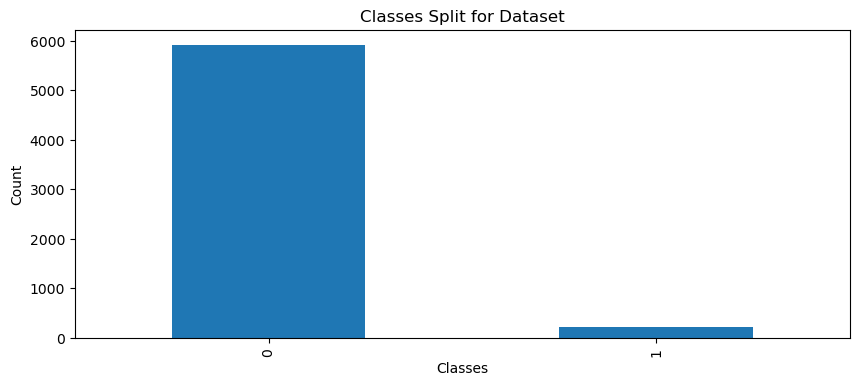

In [15]:
print('Class Split')
print(df3['Y'].value_counts())
df3['Y'].value_counts().plot.bar(figsize=(10,4),title='Classes Split for Dataset')
plt.xlabel('Classes')
plt.ylabel('Count')

#### To balance the dataset, Seperating Categories of Target Variable (Y)

In [16]:
df3_Target = df3.Y

In [17]:
df3[df3.Y == 1]

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5909,1,0.418515,0.433984,0.461427,0.612750,0.612750,0.998864,0.796902,0.808857,0.302892,...,0.725750,0.000487,0.623730,0.612747,0.828067,0.292648,0.026666,0.564481,1,0.015620
5958,1,0.196802,0.211023,0.221425,0.598056,0.598056,0.998933,0.796144,0.808149,0.301423,...,0.519388,0.017588,0.623465,0.598051,0.856906,0.259280,0.026769,0.565052,1,0.003946
5959,1,0.337640,0.254307,0.378446,0.590842,0.590842,0.998869,0.796943,0.808897,0.302953,...,0.557733,0.000847,0.623302,0.590838,0.726888,0.336515,0.026777,0.565092,1,0.011797
5960,1,0.340028,0.344636,0.380213,0.581466,0.581466,0.998372,0.796292,0.808283,0.302857,...,0.641804,0.000376,0.623497,0.581461,0.765967,0.337315,0.026722,0.564807,1,0.011777


In [18]:
df3_bankrupt = df3[df3.Y == 1]

In [19]:
df3_bankrupt.reset_index(inplace=True)

In [20]:
df3_bankrupt.drop(columns=['index'],inplace=True)

C:\Users\Aditi\AppData\Local\Temp\ipykernel_11848\3077554675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_bankrupt.drop(columns=['index'],inplace=True)


In [21]:
df3_bankrupt

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,1,0.418515,0.433984,0.461427,0.612750,0.612750,0.998864,0.796902,0.808857,0.302892,...,0.725750,0.000487,0.623730,0.612747,0.828067,0.292648,0.026666,0.564481,1,0.015620
206,1,0.196802,0.211023,0.221425,0.598056,0.598056,0.998933,0.796144,0.808149,0.301423,...,0.519388,0.017588,0.623465,0.598051,0.856906,0.259280,0.026769,0.565052,1,0.003946
207,1,0.337640,0.254307,0.378446,0.590842,0.590842,0.998869,0.796943,0.808897,0.302953,...,0.557733,0.000847,0.623302,0.590838,0.726888,0.336515,0.026777,0.565092,1,0.011797
208,1,0.340028,0.344636,0.380213,0.581466,0.581466,0.998372,0.796292,0.808283,0.302857,...,0.641804,0.000376,0.623497,0.581461,0.765967,0.337315,0.026722,0.564807,1,0.011777


In [22]:
df3_safe = df3[df3.Y == 0]

In [23]:
df3_safe.reset_index(drop=True,inplace=True)

In [24]:
df3_safe

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95
0,0,0.390923,0.445704,0.436158,0.619950,0.619950,0.998993,0.797012,0.808960,0.302814,...,0.736619,0.018372,0.623655,0.619949,0.829980,0.292504,0.026622,0.564200,1,0.015663
1,0,0.508361,0.570922,0.559077,0.601738,0.601717,0.999009,0.797449,0.809362,0.303545,...,0.815350,0.010005,0.623843,0.601739,0.841459,0.278607,0.027031,0.566089,1,0.034889
2,0,0.488519,0.545137,0.543284,0.603612,0.603612,0.998961,0.797414,0.809338,0.303584,...,0.803647,0.000824,0.623977,0.603613,0.840487,0.276423,0.026891,0.565592,1,0.065826
3,0,0.495686,0.550916,0.542963,0.599209,0.599209,0.999001,0.797404,0.809320,0.303483,...,0.804195,0.005798,0.623865,0.599205,0.840688,0.279388,0.027243,0.566668,1,0.030801
4,0,0.482475,0.567543,0.538198,0.614026,0.614026,0.998978,0.797535,0.809460,0.303759,...,0.814111,0.076972,0.623687,0.614021,0.841337,0.278356,0.026971,0.565892,1,0.036572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5922,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
5923,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
5924,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
5925,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [25]:
df3_bankrupt.shape

(210, 96)

In [26]:
df3_safe.shape

(5927, 96)

In [27]:
df3_safe_s3 = df3_safe[3190:3410]

In [28]:
df3_safe_s3.reset_index(drop=True,inplace=True)

In [29]:
df3_safe_s3

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95
0,0,0.546434,0.587767,0.606938,0.608974,0.608974,0.999124,0.797561,0.809477,0.303501,...,0.825237,0.003108,0.623276,0.608975,0.842127,0.278334,0.026853,0.565438,1,0.036730
1,0,0.507776,0.544538,0.564484,0.606055,0.606055,0.999023,0.797420,0.809345,0.303466,...,0.800518,0.001980,0.623410,0.606052,0.840400,0.279394,0.027879,0.567714,1,0.030774
2,0,0.577682,0.656891,0.640184,0.608650,0.608650,0.999127,0.797561,0.809478,0.303494,...,0.858852,0.001168,0.624338,0.608648,0.844581,0.278470,0.026791,0.565158,1,0.035783
3,0,0.380442,0.428260,0.437871,0.592708,0.592708,0.998726,0.797165,0.809128,0.303640,...,0.734735,0.000830,0.623634,0.592705,0.834685,0.280674,0.026759,0.565001,1,0.026386
4,0,0.466290,0.522078,0.518925,0.601926,0.601926,0.998963,0.797344,0.809273,0.303459,...,0.788158,0.002102,0.624102,0.601921,0.839115,0.285198,0.026303,0.560832,1,0.019436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,0,0.551163,0.617804,0.612131,0.618681,0.618681,0.999112,0.797562,0.809478,0.303528,...,0.842604,0.000937,0.623989,0.618683,0.842758,0.276462,0.026794,0.565171,1,0.064606
216,0,0.598694,0.660979,0.662027,0.624404,0.624404,0.999209,0.797637,0.809545,0.303456,...,0.859317,0.001279,0.624090,0.624402,0.843819,0.276661,0.026791,0.565158,1,0.059136
217,0,0.570516,0.600905,0.624605,0.619251,0.619251,0.999264,0.797744,0.809610,0.303525,...,0.833060,0.000816,0.622540,0.619251,0.842069,0.275945,0.026818,0.565282,1,0.086845
218,0,0.634768,0.721871,0.705605,0.622191,0.622191,0.999295,0.797765,0.809673,0.303498,...,0.887702,0.001769,0.624474,0.622189,0.845422,0.276519,0.026791,0.565159,1,0.062903


##### Creating Dataset with Sample S3

In [41]:
df3_S3 = pd.concat([df3_bankrupt,df3_safe_s3])

In [42]:
df3_S3.reset_index(drop=True,inplace=True)

In [43]:
df3_S3.reset_index(drop=True,inplace=True)

In [45]:
r = 'OOS2.csv'
df3_S3.to_csv(r,index=False)

In [44]:
Out_Of_Sample

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0,0.522644,0.575611,0.563681,0.603043,0.603043,0.999029,0.797462,0.809365,0.303525,...,0.817939,0.000552,0.623988,0.603040,0.842382,0.283410,0.026869,0.565506,1,0.021322
1,0,0.533467,0.582370,0.584721,0.627250,0.627250,0.999128,0.797558,0.809469,0.303487,...,0.821188,0.000635,0.623831,0.627247,0.842077,0.279696,0.026824,0.565311,1,0.029536
2,0,0.455175,0.505997,0.506076,0.592413,0.592413,0.998861,0.797249,0.809205,0.303504,...,0.780093,0.001906,0.625206,0.592411,0.838983,0.277680,0.026617,0.564161,1,0.042518
3,0,0.526593,0.543120,0.570105,0.599490,0.599490,0.999005,0.797418,0.809341,0.303499,...,0.802256,0.002432,0.623523,0.599490,0.840498,0.278525,0.026899,0.565625,1,0.035418
4,0,0.535222,0.585696,0.587130,0.620627,0.620598,0.999176,0.797465,0.809387,0.303223,...,0.829371,0.003897,0.623773,0.620625,0.842579,0.279014,0.026804,0.565221,1,0.032573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,0,0.505094,0.553914,0.560576,0.604513,0.604780,0.999024,0.797437,0.809396,0.303493,...,0.807381,0.007940,0.627482,0.604512,0.841046,0.280743,0.027032,0.566095,1,0.026202
678,0,0.603325,0.649695,0.638953,0.608541,0.607929,0.999132,0.797677,0.809528,0.303685,...,0.856641,0.002147,0.623729,0.608543,0.846003,0.282225,0.026810,0.565248,1,0.023065
679,1,0.397894,0.303969,0.363778,0.593429,0.593429,0.998691,0.796867,0.808553,0.303194,...,0.627605,0.000132,0.624102,0.593427,0.829992,0.276669,0.026791,0.565156,1,0.058930
680,1,0.335543,0.372547,0.375395,0.596701,0.596701,0.998865,0.797103,0.809046,0.303242,...,0.698642,0.001071,0.623666,0.596699,0.828697,0.284867,0.026771,0.565060,1,0.019736


In [34]:
df3_S3

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,0,0.551163,0.617804,0.612131,0.618681,0.618681,0.999112,0.797562,0.809478,0.303528,...,0.842604,0.000937,0.623989,0.618683,0.842758,0.276462,0.026794,0.565171,1,0.064606
426,0,0.598694,0.660979,0.662027,0.624404,0.624404,0.999209,0.797637,0.809545,0.303456,...,0.859317,0.001279,0.624090,0.624402,0.843819,0.276661,0.026791,0.565158,1,0.059136
427,0,0.570516,0.600905,0.624605,0.619251,0.619251,0.999264,0.797744,0.809610,0.303525,...,0.833060,0.000816,0.622540,0.619251,0.842069,0.275945,0.026818,0.565282,1,0.086845
428,0,0.634768,0.721871,0.705605,0.622191,0.622191,0.999295,0.797765,0.809673,0.303498,...,0.887702,0.001769,0.624474,0.622189,0.845422,0.276519,0.026791,0.565159,1,0.062903


In [33]:
df3_S3[df3_S3.Y == 0]

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95
210,0,0.546434,0.587767,0.606938,0.608974,0.608974,0.999124,0.797561,0.809477,0.303501,...,0.825237,0.003108,0.623276,0.608975,0.842127,0.278334,0.026853,0.565438,1,0.036730
211,0,0.507776,0.544538,0.564484,0.606055,0.606055,0.999023,0.797420,0.809345,0.303466,...,0.800518,0.001980,0.623410,0.606052,0.840400,0.279394,0.027879,0.567714,1,0.030774
212,0,0.577682,0.656891,0.640184,0.608650,0.608650,0.999127,0.797561,0.809478,0.303494,...,0.858852,0.001168,0.624338,0.608648,0.844581,0.278470,0.026791,0.565158,1,0.035783
213,0,0.380442,0.428260,0.437871,0.592708,0.592708,0.998726,0.797165,0.809128,0.303640,...,0.734735,0.000830,0.623634,0.592705,0.834685,0.280674,0.026759,0.565001,1,0.026386
214,0,0.466290,0.522078,0.518925,0.601926,0.601926,0.998963,0.797344,0.809273,0.303459,...,0.788158,0.002102,0.624102,0.601921,0.839115,0.285198,0.026303,0.560832,1,0.019436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,0,0.551163,0.617804,0.612131,0.618681,0.618681,0.999112,0.797562,0.809478,0.303528,...,0.842604,0.000937,0.623989,0.618683,0.842758,0.276462,0.026794,0.565171,1,0.064606
426,0,0.598694,0.660979,0.662027,0.624404,0.624404,0.999209,0.797637,0.809545,0.303456,...,0.859317,0.001279,0.624090,0.624402,0.843819,0.276661,0.026791,0.565158,1,0.059136
427,0,0.570516,0.600905,0.624605,0.619251,0.619251,0.999264,0.797744,0.809610,0.303525,...,0.833060,0.000816,0.622540,0.619251,0.842069,0.275945,0.026818,0.565282,1,0.086845
428,0,0.634768,0.721871,0.705605,0.622191,0.622191,0.999295,0.797765,0.809673,0.303498,...,0.887702,0.001769,0.624474,0.622189,0.845422,0.276519,0.026791,0.565159,1,0.062903


Class Split
0    220
1    210
Name: Y, dtype: int64


Text(0, 0.5, 'Count')

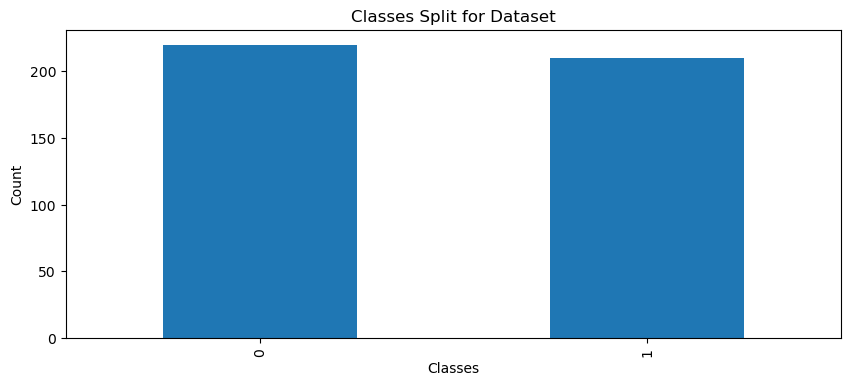

In [35]:
print('Class Split')
print(df3_S3['Y'].value_counts())
df3_S3['Y'].value_counts().plot.bar(figsize=(10,4),title='Classes Split for Dataset')
plt.xlabel('Classes')
plt.ylabel('Count')

In [48]:
if df3_S3[df3_S3['Y'] == 0].shape[0] == 0:
    raise ValueError("No Records for the class 0")
else:
    Cl0 = df3_S3[df3_S3['Y'] == 0].shape[0]

In [49]:
if df3_S3[df3_S3['Y'] == 1].shape[0] == 0:
    raise ValueError("No Records for the class 1")
else:
    Cl1 = df3_S3[df3_S3['Y'] == 1].shape[0]

In [50]:
Cl1

210

In [51]:
Cl0

220

In [52]:
wt0 = (Cl0 + Cl1)/Cl0

In [53]:
wt1 = (Cl0 + Cl1)/Cl1

In [54]:
wt = [wt0,wt1]

In [55]:
wt

[1.9545454545454546, 2.0476190476190474]

##### Checking if Data is Normally Distributed in these Indepedent variables 

##### Normality test - Shapiro-Wilk Test

#### FINAL RESULT OF EDA & DATA PRE_PROCESSING: 
+ No Missing Values
+ Outlier (Values > 3 Standard Deviation ) present in most of the columns (86 columns / 95) (DIdnt treated that because we dont know that they are real Outliers or Valid Values) 
+ Imbalance Dataset is being Balanced. (Didnt use Oversampling Technique like SMOTE as this will cause significant imbalance)
+ None of the column is NORMALLY DISTRIBUTED as per Shapiro-Wilk Test.

#### MODEL BUILDING

## LOGISTIC REGRESSION

### Checking Assumptions of Logistic Regression Model

###### Since Logistic Regression is a Parametric Supervised Model, it has some assumption:

1. Observations to be independent of each other. – Passed – Since each record taken is of individual user data, the observations are independent of each other.

2. Little or No multicollinearity among the independent variables

3. Assumes linearity of independent variables and log odds.

4. Large Sample Size – Failed
+ Minimum Threshold = 10
+ Records in minority class (B)- 220
+ Number of Independent Variables (C) – 95
+ B/C < A = 2.3 < 10, Not Enough records
+ Our dataset – 440 records 

###### Assumption 1 : Outliers Check 

##### Result : Fail - Since there are Outliers in most of the columns 

###### Assumption 2 : Checking for Multi-Collinearity

##### Correlation between Independent Columns

###### Result : We have variables with VIF as high as inf

##### Result : FAIL - Presence of Multi-Colinearity between the columns and with the Target columns 

##### Assumption 3: Assumes linearity of independent variables and log odds

In [44]:
df3_S3

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,0,0.551163,0.617804,0.612131,0.618681,0.618681,0.999112,0.797562,0.809478,0.303528,...,0.842604,0.000937,0.623989,0.618683,0.842758,0.276462,0.026794,0.565171,1,0.064606
426,0,0.598694,0.660979,0.662027,0.624404,0.624404,0.999209,0.797637,0.809545,0.303456,...,0.859317,0.001279,0.624090,0.624402,0.843819,0.276661,0.026791,0.565158,1,0.059136
427,0,0.570516,0.600905,0.624605,0.619251,0.619251,0.999264,0.797744,0.809610,0.303525,...,0.833060,0.000816,0.622540,0.619251,0.842069,0.275945,0.026818,0.565282,1,0.086845
428,0,0.634768,0.721871,0.705605,0.622191,0.622191,0.999295,0.797765,0.809673,0.303498,...,0.887702,0.001769,0.624474,0.622189,0.845422,0.276519,0.026791,0.565159,1,0.062903


In [45]:
df3_S3.shape

(430, 96)

###### Result : Non-Linearity between Log Odds and most of the variables

### MODEL Building

##### Preparing data for our ML Model , variable (x) has all the independent columns data and variable (Y) has the records for our dependent variable (Target). to_numpy() - We have converted these dataframes into numpy array because machine learning libraries expect input data to be in the form of Numpy Array

In [46]:
x = df3_S3.drop('Y', axis=1).to_numpy()
Y = df3_S3['Y'].to_numpy()


##### Splitting of the shuffled data into Train and Test Set ;  Stratified = Y means that class distribution ( in our case,220 for each category) will remain as it is in both our training and test dataset ; random_state = 100 means that it will keep the sequence of records taken as it is (for example if it has taken row 0,2,5; next time too it will take the same row number, but records in these rows will be shuffled)

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=0.20,stratify=Y,random_state=100)

##### StandardScaler() will scale the data in a way that mean of data will be 0 with standard deviation as 1 for each feature / independent variable. fit_transform() will calculate mean and SD for the feature, transform function will scale the value based on the formula used for standardization (X-mean)/sd 

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

In [292]:
from sklearn.preprocessing import RobustScaler

###### ROBUST SCALER

In [293]:
rsc = RobustScaler()
x_train_rsc = rsc.fit_transform(x_train)
x_test_rsc = rsc.transform(x_test)

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
from sklearn.metrics import classification_report, confusion_matrix

In [181]:
for name,method in [('LogReg', LogisticRegression(multi_class='multinomial',solver='newton-cg',
                                               random_state=100,max_iter=1000))]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)
    print('\nEstimator: {}'.format(name)) 
    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict))  


Estimator: LogReg
[[39  5]
 [ 3 39]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        44
           1       0.89      0.93      0.91        42

    accuracy                           0.91        86
   macro avg       0.91      0.91      0.91        86
weighted avg       0.91      0.91      0.91        86



In [43]:
Coef_List = method.coef_[0].tolist()

### ELASTICNET-Regularized Logistic Regression

In [46]:
for name,method3 in [('LogReg_Elastic_Net', LogisticRegression(penalty = 'elasticnet',solver='saga',l1_ratio=0.5,C=1.0,
                                               random_state=100,max_iter=1000))]: 
    method3.fit(x_train2,y_train)
    predict = method3.predict(x_test2)
    print('\nEstimator: {}'.format(name)) 
    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict))


Estimator: LogReg_Elastic_Net
[[39  5]
 [ 3 39]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        44
           1       0.89      0.93      0.91        42

    accuracy                           0.91        86
   macro avg       0.91      0.91      0.91        86
weighted avg       0.91      0.91      0.91        86



C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


##### REsult : Results of Elastic Net validated that there is Multi-Colinearity between the variables, which it handled , thus improving the model performance. Also Elastic Net works well with Non-Linear Relation.

In [47]:
Coef_List3 = method3.coef_[0].tolist()

In [48]:
Coef_List3

[-1.2092391402781208,
 0.0,
 -1.1105211185677049,
 0.0,
 0.0,
 0.44895785589523285,
 0.021358028399932363,
 0.0,
 0.0,
 0.0,
 -0.5597456283301712,
 0.0,
 -0.4815844474439019,
 -0.20335145499390528,
 0.4541346424666706,
 0.0,
 0.1930226682692635,
 0.23176178119593588,
 -1.0884710468490673,
 -0.40400801509839207,
 0.5322855819231844,
 0.01106168985802469,
 -0.540542887213779,
 0.20969317078628416,
 -0.3946134730259214,
 0.18002694634811642,
 0.2541124623695281,
 -0.25894047276891163,
 -0.37425018539041444,
 0.0,
 -0.5335906487322878,
 1.125863752238006,
 -0.25465544429499815,
 0.0,
 0.22402690274269013,
 0.3562295775950653,
 0.9970253362185647,
 -0.9970253362185679,
 0.025025374990078907,
 0.0,
 0.0,
 0.035881206301548244,
 -0.41237201708335913,
 0.0,
 -1.3368962694960802,
 0.0,
 0.0,
 -0.5287447962783759,
 -0.42842008626340305,
 0.0,
 0.0,
 0.5081736063104048,
 0.0,
 -0.2515500120938344,
 -0.0738630000392434,
 0.0,
 -1.3471441834325855,
 0.0,
 0.02542034001221677,
 0.2760245728364755,
 

### Hyperparameteric Tunning of Elastic Net using Grid Search

In [61]:
from sklearn.model_selection import GridSearchCV, train_test_split

In [62]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'l1_ratio': [0.2, 0.5, 0.8, 1.0],
    'class_weight': [None, 'balanced']
}

In [63]:
grid_search = GridSearchCV(
    LogisticRegression(penalty='elasticnet', solver='saga', max_iter=1000, random_state=42),
    param_grid,
    scoring='accuracy',
    cv=5
)

In [64]:
grid_search.fit(x_train2,y_train)

C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, penalty='elasticnet',
                                          random_state=42, solver='saga'),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'class_weight': [None, 'balanced'],
                         'l1_ratio': [0.2, 0.5, 0.8, 1.0]},
             scoring='accuracy')

##### GRID FIT ON ROBUST SCALER

In [294]:
grid_search.fit(x_train_rsc,y_train)

C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, penalty='elasticnet',
                                          random_state=42, solver='saga'),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'l1_ratio': [0.2, 0.5, 0.8, 1.0]},
             scoring='accuracy')

In [65]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Parameters: {'C': 0.1, 'class_weight': None, 'l1_ratio': 0.8}
Best Cross-Validation Accuracy: 0.906990622335891


In [66]:
best_model = grid_search.best_estimator_
y_pred2 = best_model.predict(x_test2)
print("\nEstimator:", confusion_matrix(y_test,y_pred2))
print("\nClassification Report:")
print(classification_report(y_test,y_pred2))


Estimator: [[40  4]
 [ 1 41]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.91      0.94        44
           1       0.91      0.98      0.94        42

    accuracy                           0.94        86
   macro avg       0.94      0.94      0.94        86
weighted avg       0.94      0.94      0.94        86



In [75]:
best_model

LogisticRegression(C=0.1, l1_ratio=0.8, max_iter=1000, penalty='elasticnet',
                   random_state=42, solver='saga')

In [67]:
Coef_List4 = best_model.coef_[0].tolist()

In [68]:
print(Coef_List4)

[-0.3892053411345773, 0.0, -0.33907275043153606, 0.0, 0.0, 0.16977661437774175, 0.0, 0.0, 0.0, 0.0, -0.03733753770928278, 0.0, 0.0, -0.022117290179774245, 0.06854604576122561, 0.0, 0.0, 0.0, -0.570489899566478, 0.0, 0.0, 0.0, -0.14727269762155912, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.03168369607842327, 0.0, 0.0, 0.0, 0.0, 0.038332893045898715, 0.5863507996201966, -0.5863507996202268, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.1376518532435904, 0.0, 0.0, -0.032637798661758734, 0.0, 0.0, 0.0, 0.0, 0.0, -0.1998352762551051, 0.0, 0.0, -0.7008821974760654, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.14977115115501616, 0.0, 0.0, 0.011685803493079164, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [76]:
best_model.columns

AttributeError: 'LogisticRegression' object has no attribute 'columns'

In [69]:
positive_dict = {}
negative_dict = {}

for idx, value in enumerate(Coef_List4):
    if abs(value) > 0.5:
        if value > 0:
            positive_dict[idx] = value
        elif value < 0:
            negative_dict[idx] = value

In [70]:
positive_dict

{36: 0.5863507996201966}

In [71]:
negative_dict

{18: -0.570489899566478, 37: -0.5863507996202268, 56: -0.7008821974760654}

In [72]:
ref = df10.columns.to_list()

In [73]:
L1 = []
for i in positive_dict.keys():
    L1.append(ref[i])
print(f"Positively Correlated Variables : {L1}")

Positively Correlated Variables : [' Debt ratio %']


In [74]:
L2 = []
for i in negative_dict.keys():
    L2.append(ref[i])
print(f"Negative Correlated Variables : {L2}")

Negative Correlated Variables : [' Persistent EPS in the Last Four Seasons', ' Net worth/Assets', ' Cash/Total Assets']


In [66]:
data = [0.448349827,0.446358482,0.489961989,0.596498941,0.596498941,0.998942165,0.79726357,0.809184459,0.303360654,0.781519448,7320000000,611000000,0.462424197,0.000260026,0,0.150056888,0.150056888,0.150056888,0.20090763,0.323123718,0.067713296,0.0894064,0.124726971,0.02215446,0.848094072,0.689270828,0.689270828,0.217608865,4570000000,0.000580888,0.26361284,0.390382251,0.00656285,0.004884671,0.630283147,0.025060415,0.217552982,0.782447018,0.005339276,0.392762641,0.005365848,0.089379061,0.140532388,0.423960676,0.265367316,0.000866363,0.007303484,0.00017445,0.00127016,0.158064516,0.114137156,0.384941544,0.011537582,0.770421251,0.61143287,0.792149483,0.173804256,0.004928127,0.0041446,0.222535084,0.343714778,0.278393291,0.004575568,0.98183908,0.734985126,0.348074061,0.000102016,0.911195355,0.00204701,0.056908436,9480000000,7570000000,0.593921382,6200000000,0.671565689361367,0.123607901258435,0.981839080454162,0.348074061159397,0.111216175812565,0.618972890642733,0.456442081050936,0.585987227489695,0.306239300335543,0.0439489664854151,0,0.73499852242457,0.00123820616744881,0.623588003626321,0.596494320403622,0.82951484114618,0.292953607005028,0.0266853922647272,0.564598002291724,1,0.015529466088687]

In [67]:
reshaped_data = np.array(data).reshape(1,-1)

In [68]:
reshaped_data

array([[4.48349827e-01, 4.46358482e-01, 4.89961989e-01, 5.96498941e-01,
        5.96498941e-01, 9.98942165e-01, 7.97263570e-01, 8.09184459e-01,
        3.03360654e-01, 7.81519448e-01, 7.32000000e+09, 6.11000000e+08,
        4.62424197e-01, 2.60026000e-04, 0.00000000e+00, 1.50056888e-01,
        1.50056888e-01, 1.50056888e-01, 2.00907630e-01, 3.23123718e-01,
        6.77132960e-02, 8.94064000e-02, 1.24726971e-01, 2.21544600e-02,
        8.48094072e-01, 6.89270828e-01, 6.89270828e-01, 2.17608865e-01,
        4.57000000e+09, 5.80888000e-04, 2.63612840e-01, 3.90382251e-01,
        6.56285000e-03, 4.88467100e-03, 6.30283147e-01, 2.50604150e-02,
        2.17552982e-01, 7.82447018e-01, 5.33927600e-03, 3.92762641e-01,
        5.36584800e-03, 8.93790610e-02, 1.40532388e-01, 4.23960676e-01,
        2.65367316e-01, 8.66363000e-04, 7.30348400e-03, 1.74450000e-04,
        1.27016000e-03, 1.58064516e-01, 1.14137156e-01, 3.84941544e-01,
        1.15375820e-02, 7.70421251e-01, 6.11432870e-01, 7.921494

In [69]:
result = best_model.predict(reshaped_data)

In [70]:
print("Prediction:", result)

Prediction: [0]


In [77]:
best_model

LogisticRegression(C=0.1, l1_ratio=0.8, max_iter=1000, penalty='elasticnet',
                   random_state=42, solver='saga')

In [76]:
import pickle

In [78]:
data = best_model

In [79]:
with open("data.pkl", "wb") as file:
    pickle.dump(data, file)

## MANUAL TESTING OF MODELS

### Data for 1

In [163]:
# Row - 6315 , Ans : 1
data11 = [0.448349826939014,0.446358482337549,0.489961989399861,0.596498940601623,0.596498940601623,0.998942165147028,0.79726357026582,0.809184459436235,0.303360654172605,0.781519448049132,7320000000,611000000,0.462424196673461,0.00026002600260026,0,0.150056887615355,0.150056887615355,0.150056887615355,0.200907629762693,0.323123717903374,0.0677132961265635,0.0894064001302825,0.124726971454395,0.0221544600810688,0.84809407164976,0.689270828211789,0.689270828211789,0.21760886484499,4570000000,0.000580888107495094,0.263612840058745,0.390382251033866,0.0065628500379094,0.00488467061848789,0.630283146806208,0.0250604145578566,0.217552982434925,0.782447017565076,0.00533927569376088,0.392762641388735,0.00536584771375646,0.089379061019102,0.140532388206018,0.423960676452896,0.265367316341829,0.000866363000010145,0.00730348352169142,0.000174449676236305,0.0012701597193696,0.158064516129032,0.114137156118267,0.384941543610502,0.0115375817225895,0.770421251201286,0.611432870222155,0.792149483044045,0.173804255896921,0.00492812736068918,0.00414459970163201,0.222535084244841,0.343714778137872,0.278393291150292,0.00457556844374029,0.981839080454162,0.73498512556992,0.348074061159397,0.000102015991184969,0.911195354812075,0.00204701006428485,0.056908435699192,9480000000,7570000000,0.593921381895814,6200000000,0.671565689361367,0.123607901258435,0.981839080454162,0.348074061159397,0.111216175812565,0.618972890642733,0.456442081050936,0.585987227489695,0.306239300335543,0.0439489664854151,0,0.73499852242457,0.00123820616744881,0.623588003626321,0.596494320403622,0.82951484114618,0.292953607005028,0.0266853922647272,0.564598002291724,1,0.015529466088687]

In [162]:
# Row - 31 ; Ans : 1
data12 = [0.41612635889436,0.470235499345835,0.463782857754698,0.599115005981637,0.599115005981637,0.998972554067436,0.797240882429557,0.809175866411272,0.303257690436385,0.781428500450948,8480000000,50900000,0.460246764466588,0.000842084208420842,0,0.156209177868611,0.156209177868611,0.156209177868611,0.177838706627588,0.313185258541416,0.060529062117156,0.0985261786499471,0.139639978910899,0.0221487393712728,0.848455060039407,0.689099177113464,0.689099177113464,0.217575505281166,654000000,0.000417985900873907,0.263455097870092,0.369136768376737,0.0042920302900771,0.00193390535342432,0.62927528390022,0.0259513583016442,0.219608791607461,0.780391208392539,0.00500301431132559,0.392590413860514,0.0168957784927367,0.0985473968765776,0.138624538119297,0.407168589392342,0.214392803598201,0.00271473933024256,0.00232860979348211,0.000128401076046875,0.000384300856128502,0.0919354838709677,0.0544453094017596,0.394100088193392,0.0179945138695616,0.703730256210006,0.316573275042899,0.469679801466946,0.0082664170023762,0.00282666989337319,0.000221174007675535,0.198285095189837,0.337687537935178,0.276486186212684,0.00413912788778578,0.86521574848973,0.724531115070391,0.34619823102173,0.0015541133461602,0.908947697741883,0.00208350375743525,0.0530895531056673,788000000,5430000000,0.593891386167004,423000000,0.671566921816088,0.282042669898768,0.86521574848973,0.34619823102173,0.113571113350474,0.629328600872714,0.457681019495935,0.543739915343004,0.309716168415727,0.0658158530780964,0,0.750430839246873,0.00301060874446671,0.623182971273566,0.599110128995664,0.831976032408709,0.293599485101659,0.0264718727329476,0.562976864746142,1,0.0153485951260125]

In [164]:
# row - 32 ; Ans : 1
data13 = [0.462194705796324,0.536033580462276,0.514427967235933,0.599987027774975,0.599987027774975,0.998908887545973,0.797290546656498,0.809222607259179,0.303477394746771,0.781367728367594,0.000162469273938113,0,0.458983585382015,0.000943094309430943,0,0.14550587838692,0.14550587838692,0.14550587838692,0.202514890800794,0.312690103982457,0.0135819834535747,0.0919306245419754,0.165549446411087,0.0229509978063606,0.848122634506114,0.688191177716392,0.6879893744248,0.217611038376702,6430000000,0.000417811220198915,0.263748824704136,0.370291717894266,0.00212355031653567,0.00138866881184598,0.648523650360954,0.030692419226876,0.228890165371708,0.771109834628292,0.00487973886406,0.396528161437585,0.00536584771375646,0.0919113456120638,0.164565266571148,0.40318023426395,0.0644677661169415,0.00134519594615158,0.00469820721809262,0.000116172402137649,4840000000,0.0374193548387097,0.012308505794398,0.389814793876213,0.031878626966503,0.673325140693406,0.105993835359631,0.172224524669076,0.0110609135539858,0.00130556395852379,0.000415664176521318,0.141036557645787,0.336370895458632,0.276849112615976,0.00246944591895207,0.586269036860146,0.718087877347825,0.342348547915856,0.027677718850612,0.868460717296699,0.00216237850524178,0.0224017065989479,0.000101454947850908,6420000000,0.593788635819852,1870000000,0.671576937499325,0.669737403553366,0.586269036860146,0.342348547915856,0.130978632532992,0.646486979649545,0.459674631197096,0.533221122473752,0.316005968085055,0.124882710179452,0,0.787081562191271,0.00163072025918424,0.62187648014822,0.599983643746719,0.838258501827446,0.297038120702888,0.0248858579240944,0.576472530618164,1,0.0145615712801164]

#### Data for 0

In [159]:
# Row 164; Ans - 0
data01 = [0.445522351679423,0.501253815961622,0.492531720113496,0.600642845817899,0.600635639026218,0.998996934532097,0.797276020907671,0.809208936537646,0.303268083489572,0.781457693507155,8490000000,0,0.471927396559389,0.000261026102610261,0,0.172390544014159,0.172390544014159,0.172390544014159,0.201853077432164,0.325917804343213,0.0263623576387313,0.0996661509649051,0.160051216389245,0.0220762981179449,0.848001348242109,0.688935229972654,0.688935229972654,0.217534118582667,6650000000,0.00043797436096943,0.26281480445408,0.383936887597332,0.0169834103481736,0.0141256190056732,0.630279037273462,0.00946844308264711,0.150648486863984,0.849351513136016,0.00539859140073528,0.375009785655013,0.006364555913035,0.0996466200921719,0.159075484503431,0.398986901529026,0.11544227886057,0.00133910908666673,0.00472553230551156,0.000165278170804385,0.000198202410050526,0.0337096774193548,0.0243291276823877,0.394880260509713,0.0154464232712539,0.830806856615785,0.393977117964528,0.452045596287479,0.0596436280390115,0.0143112795496729,0.00623337867866862,0.0504075037213312,0.350796150311892,0.277102270874011,0.00724907067647624,0.309620430137836,0.73866076256919,0.328889756542397,0.0144040752323591,0.925320049667705,0.00211762499620418,0.0277873221159503,0.000153153295959083,0.000137841719544455,0.59398839023942,5670000000,0.67158894308252,0.291276742665819,0.309620430137836,0.328889756542397,0.123454443251068,0.665574484091902,0.463106985797332,0.614036918535819,0.318860947079667,0.0172737279757589,0,0.777670405685694,0.00971389998974796,0.624642972834412,0.600638662195016,0.838318177106704,0.281645878785154,0.026696182744105,0.564660821451651,1,0.0241310303200352]

In [160]:
# Row 65 ; Ans - 0
data02 = [0.482279530054112,0.552932839075447,0.54012527437229,0.619048991769844,0.619020164603122,0.999049392972649,0.797417128181986,0.809357361514289,0.303404643374465,0.781598746495079,0.000327251277754349,679000000,0.462227925819683,0.000594059405940594,0,0.16564830812018,0.16564830812018,0.16564830812018,0.216980240143708,0.318384381410483,0.0166069240891148,0.102027522188747,0.172177449725089,0.0221404111556306,0.848289670748849,0.689915998586396,0.689915998586396,0.217643926732124,67600000,0.000451948814968796,0.26437979345875,0.377482210051786,0.00646550244773027,0.00428578379936293,0.632716332652977,0.00965538624280725,0.152099646279892,0.847900353720108,0.00556605468596727,0.379104103712286,0.0059355805791167,0.101983487224584,0.171140939597315,0.398505941001282,0.0854572713643178,0.00116664806792935,0.00541549076283959,0.000111586649421689,0.000174750979853708,0.0275806451612903,0.0153812258566749,0.396485832523009,0.0110948048637799,0.756146613336829,0.204884781562969,0.258677948109695,0.0414608983776166,0.00501483219656056,0.00293163588716107,0.0747330743748319,0.341832133055361,0.278479209547425,0.00410166859683031,0.461016544509477,0.732394125732784,0.330234043988824,0.0280168020159051,0.931638647675746,0.00225896753334788,0.0405464091563107,0.000118604577661751,9740000000,0.593921678415765,5410000000,0.671575479013069,0.241009248289025,0.461016544509477,0.330234043988824,0.125170242602246,0.646081569886811,0.459803003113785,0.570393895678669,0.315170057862942,0.0445826325410089,0,0.802836623544174,0.00863850485847516,0.623695130407105,0.619044362966799,0.840696027385088,0.281781264328445,0.0285285079363653,0.568291502966358,1,0.023865990703559]

In [161]:
# Row 19 ; ans = 0
data03 = [0.535952810412909,0.590438290449193,0.580919749451255,0.618450828060364,0.618450828060364,0.999118836855405,0.79758825533721,0.809460738208547,0.303558605580973,0.781726606467216,0.000248734098392086,0,0.470061984684163,0.000637063706370637,0.217430914060128,0.189541106569466,0.189541106569466,0.189541106569466,0.233052850524723,0.323159086086157,0.0257573695116233,0.114160084683658,0.189274685546434,0.0221117285913221,0.848079849041304,0.689548286097398,0.689548286097398,0.217614048137409,6960000000,0.000471762594389327,0.264260126970806,0.381198539547707,0.016156579854665,0.00738315156702479,0.631059506034164,0.00332394057943261,0.0787253983130272,0.921274601686973,0.00586330062682492,0.372724975004641,0.00608425953007702,0.114172651326396,0.188288967649499,0.39900967681864,0.125937031484258,0.00123360352226269,0.00512601561799528,6900000000,0.000228462319981905,0.027741935483871,0.0164035074835128,0.4005789104724,0.00712147441627871,0.816363501604604,0.239670321306781,0.380520031394388,0.013907170944156,0.00988507492422828,0.00163933572660889,0.0446373780123085,0.354464595073761,0.277289061138294,0.0165386276180905,0.52277308137069,0.735630620471031,0.327786671384638,0.0102426745166861,0.948858906532939,0.00236095053824264,0.0400184855275817,0.000118115241546591,7550000000,0.593971344674672,1240000000,0.671570174888739,0.212349965170013,0.52277308137069,0.327786671384638,0.11598298755793,0.639850773089263,0.458302724478283,0.600655219799222,0.3141739947153,0.0181566375652698,0,0.826642041201762,0.00274630527782319,0.623824630727491,0.618451695960642,0.841983321753659,0.277189778453972,0.0269078077255092,0.565659317841955,1,0.0488219275181613]

### For Both Scenarios

In [165]:
# Row 1947 ; Ans - 0
data_E0 = [0.444011114902745,0.475741386829481,0.483698270785374,0.616454546764871,0.616454546764871,0.998508285313832,0.796826691077303,0.808754027003972,0.303504706723749,0.781007166053191,0.000827610386886174,0.00046436298482,0.466928361138371,0.000206020602060206,0,0.159496017866925,0.159496017866925,0.159496017866925,0.20364942800416,0.319763740539011,0.00434078981199994,0.0860679097793339,0.161256307900881,0.0220494013000645,0.847981208369755,0.689157519443404,0.689157519443404,0.217567793391548,5060000000,0.000409750954767138,0.263636151712241,0.381841213069558,0.0156336485689592,0.00718913719124577,0.630467390857659,0.00272754630262906,0.0678114702058832,0.932188529794117,0.00575982489046686,0.372355916015594,0.00536584771375646,0.0860325370071816,0.16028203001282,0.39855283130343,0.0374812593703148,0.00134519594615158,0.00469906112707446,1240000000,870000000,0.0141935483870968,0.00370136451096456,0.38635489925601,0.00514232368229903,0.82701529034755,0.212208122473262,0.452362613628733,0.166220393566767,0.00713153126939123,0.0160042470069391,0.0547554915109738,0.353089328866247,0.277421271348091,0.022295197531104,0.743419927887156,0.736026865108368,0.328056760056768,0.00417845241880777,0.906169678002625,0.00210034581247909,0.048272184344221,0.000460083703906138,0.000218075934113539,0.594113180335533,0.00044605428526978,0.671439427996308,0.225817088137689,0.743419927887156,0.328056760056768,0.113259338870188,0.578871494302926,0.435998584155858,0.59279072644933,0.306791585194885,0.0187625021830364,0,0.759320012164243,0.000505079969244936,0.623771315786825,0.616453420145017,0.837831488490441,0.276757255570864,0.0267451391476305,0.564928984450187,1,0.0568620872930985]

In [166]:
# Row 6364 ; Ans - 1
data_E1 = [0.444011114902745,0.501144788486699,0.485464960650998,0.593695498637916,0.593695498637916,0.998878614172792,0.7972150127626,0.809118970170225,0.303408752255957,0.781368289772521,9180000000,0,0.459726730580509,0.000386038603860386,0,0.133791243521133,0.133791243521133,0.133791243521133,0.205918502410892,0.315625663153427,0.00975543354961659,0.0914420649784219,0.164118400241018,0.0221107804073781,0.848006465557807,0.688651770502164,0.688651770502164,0.217522922405572,2000000000,0.000245301576453165,0.263346310153779,0.358909876681197,0.00182277122380273,0.00181225646828957,0.629392063122423,0.0291394231207653,0.226108776491217,0.773891223508783,0.213835626415161,0.402843543592577,0.00536584771375646,0.0914553715374469,0.163147575597617,0.394995866954796,0.0719640179910045,0.00438862568857598,0.00144139836134866,19100000,0.10095462450856,0.0261290322580645,0.158312647797541,0.348703104859682,0.000163559529863361,0.631612627470239,0.226832775518607,0.217311704226416,0.0422612907131565,0.00196205543465263,0.00111194195251022,0.201643821262942,0.336382662388577,0.276974860487935,0,0.854821239072878,0.711440213901655,0.34838204568277,0.015638795248625,0.876916911402623,0.00203590008062134,0.031028047546036,6680000,7610000000,0.593805624747643,4000000000,0.671561750888282,0.000475911476818528,0.854821239072878,0.34838204568277,0.124557012414867,0.628524717763948,0.457634446429652,0.533680946506854,0.30896429708057,0.142564865223786,0,0.760692530312411,0.000808836359013196,0.622710127362648,0.593690462442122,0.833228607256314,0.295911725163834,0.0264316927486107,0.562560806970232,1,0.0147912990559212]

In [174]:
result_E0 = np.array(data_E0).reshape(1,-1)

#### GRIDSEARCH

In [282]:
r = best_model.predict(result_E1)

#### RANDOM FOREST

In [283]:
r2 = rf_classifier.predict(result_E1)

#### RANDOMSEARCH

In [284]:
r3 = RS_model.predict(result_E1)

#### XGBOOST

In [285]:
r4 = xg_clf.predict(result_E1)

#### CATBOOST

In [286]:
r5 = cat_clf.predict(result_E1)

In [287]:
print("Prediction:", r)

Prediction: [0]


In [288]:
print("Prediction:", r2)

Prediction: [1]


In [289]:
print("Prediction:", r3)

Prediction: [0]


In [290]:
print("Prediction:", r4)

Prediction: [1]


In [291]:
print("Prediction:", r5)

Prediction: [1]


In [98]:
from sklearn.model_selection import learning_curve

In [99]:
def plot_learning_curves(model):
    train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                                                            X=x_train, 
                                                            y=y_train,
                                                            train_sizes= np.linspace(0.1, 1.0, 10),
                                                            cv=10,
                                                            scoring='recall_weighted',random_state=100)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean,color='blue', marker='o', 
             markersize=5, label='training recall')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5,
             label='validation recall')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,
                     alpha=0.15, color='green')
    plt.grid(True)
    plt.xlabel('Number of training samples')
    plt.ylabel('Recall')
    plt.legend(loc='best')
    plt.ylim([0.5, 1.01])
    plt.show()

Mulit-Logisistic Regression - Learning Curve


C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

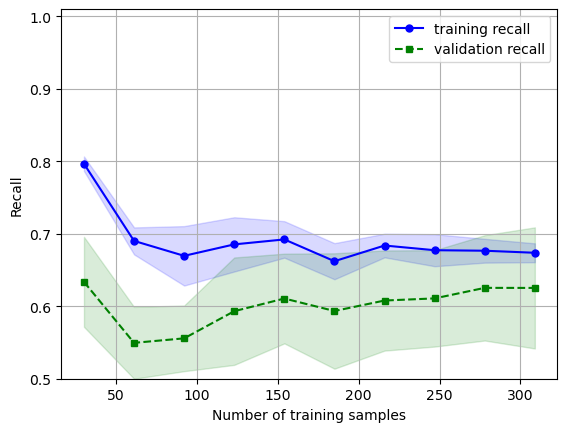

In [100]:
#Plot Learning Curve
print('Elastic Net Logistic Regression with Gridsearch - Learning Curve')
plot_learning_curves(best_model)

Logistic Regression - Learning Curve


C:\Users\Aditi\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\Aditi\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\Aditi\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\Aditi\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:416: LineSearchWarning: Roundin

C:\Users\Aditi\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Aditi\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\Aditi\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\Aditi\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Aditi\anaconda3\Lib\site-pa

C:\Users\Aditi\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Aditi\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\Aditi\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Aditi\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users

C:\Users\Aditi\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\Aditi\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\Aditi\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Aditi\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Aditi\anaconda3\Lib\site-pa

C:\Users\Aditi\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\Aditi\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\Aditi\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\Aditi\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\utils\optimiz

C:\Users\Aditi\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Aditi\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\Aditi\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\Aditi\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Aditi\anaconda3\Lib\site-pa

C:\Users\Aditi\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\Aditi\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


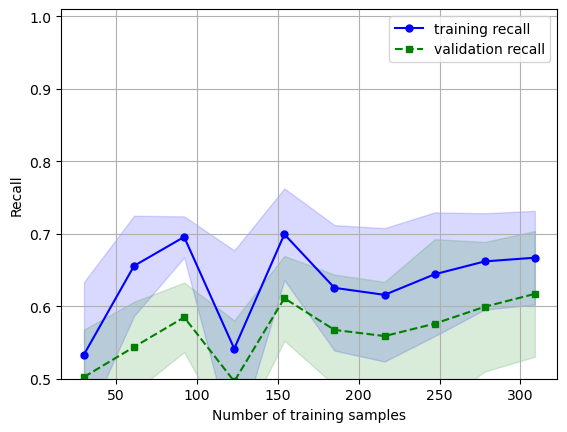

In [101]:
#Plot Learning Curve
print('Logistic Regression - Learning Curve')
plot_learning_curves(method)

Logistic Regression - Learning Curve


C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

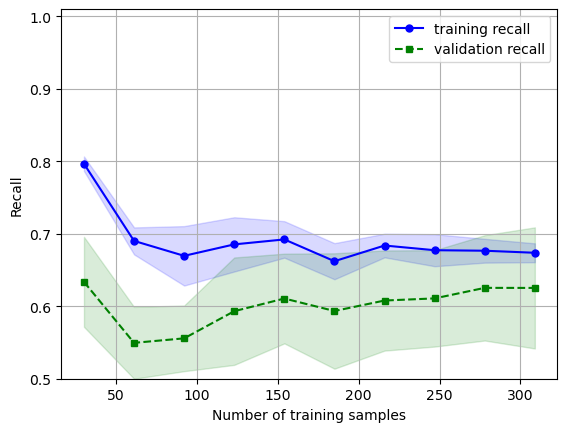

In [102]:
#Plot Learning Curve
print('Logistic Regression - Learning Curve')
plot_learning_curves(method3)

In [105]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/70/58/2f94976df39470fb00eec2cb4f914dde44cd0df8d96483208bf7db4bc97e/xgboost-2.1.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB 2.2 MB/s eta 0:00:56
   ---------------------------------------- 0.1/124.9 MB 2.0 MB/s eta 0:01:04
   ---------------------------------------- 0.1/124.9 MB 2.0 MB/s eta 0:01:04
   ---------------------------------------- 0.2/124.9 MB 1.3 MB/s eta 0:01:40
   ---------------------------------------- 0.6/124.9 MB 2.6 MB/s eta 0:00:48
   ---------------------------------------- 1.0/124.9 MB 3.8 MB/s eta 0:00:33
   ---------------------------------------- 1.0/124.9 MB 3.8 MB/s eta 0:00:33
   ---------------------------------------- 1.0/124.9 MB 3.8 MB/s eta 0:00:33
    --------------------------------------- 1.7/124.9 MB 4.0 MB/s eta 0:00:31
    ------------------

In [48]:
import xgboost as xgb

In [112]:
from sklearn.metrics import mean_squared_error

In [53]:
from sklearn.metrics import confusion_matrix, classification_report

#### XGBOOST FOR CLASSIFICATION

In [49]:
xg_clf = xgb.XGBClassifier(objective='binary:logistic', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, n_estimators=100, random_state=42)

In [50]:
xg_clf.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [51]:
y_pred2 = xg_clf.predict(x_test)

In [54]:
print("\nEstimator XgBoost:", confusion_matrix(y_test,y_pred2))
print("\nClassification Report:")
print(classification_report(y_test,y_pred2))


Estimator XgBoost: [[41  3]
 [ 0 42]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        44
           1       0.93      1.00      0.97        42

    accuracy                           0.97        86
   macro avg       0.97      0.97      0.97        86
weighted avg       0.97      0.97      0.97        86



###### Coefficient

In [55]:
importance2 = xg_clf.feature_importances_

In [56]:
IMP2 = pd.Series(importance2)

In [57]:
output_file = 'Importance_XgBoost.xlsx'
IMP2.to_excel(output_file)
print(f"IMportance results has been saved to {output_file}")

IMportance results has been saved to Importance_XgBoost.xlsx


In [64]:
df3_S3.shape

(430, 96)

In [58]:
import shap

In [59]:
explainer = shap.TreeExplainer(xg_clf)

In [60]:
shap_values = explainer.shap_values(x)

In [63]:
shap_values

array([[ 0.71619195,  0.0308265 ,  0.54860187, ..., -0.00964558,
         0.        ,  0.06298634],
       [ 0.47498292,  0.0525366 ,  0.25988898, ...,  0.0956327 ,
         0.        ,  0.0706525 ],
       [ 0.6530868 ,  0.10929289,  0.5065831 , ..., -0.00402607,
         0.        ,  0.07170147],
       ...,
       [-0.9530883 , -0.1898847 , -0.7508227 , ..., -0.08520732,
         0.        , -0.08319103],
       [-0.93843055, -0.18314296, -0.7059645 , ..., -0.08377147,
         0.        , -0.04662363],
       [ 0.46393514,  0.04536286,  0.34593976, ..., -0.04392889,
         0.        ,  0.01558255]], dtype=float32)

In [65]:
importance4 = pd.Series(shap_values.tolist())

In [66]:
output_file = 'Importance_XgBoost_SHAP.xlsx'
importance4.to_excel(output_file)
print(f"IMportance results has been saved to {output_file}")

IMportance results has been saved to Importance_XgBoost_SHAP.xlsx


#### Catboost 

In [122]:
!pip install catboost

  Obtaining dependency information for catboost from https://files.pythonhosted.org/packages/1c/e1/78e635a1e5f0066bd02a1ecfd658ad09fe30d275c65c2d0dd76fe253e648/catboost-1.2.7-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for graphviz from https://files.pythonhosted.org/packages/00/be/d59db2d1d52697c6adc9eacaf50e8965b6345cc143f671e1ed068818d5cf/graphviz-0.20.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.1/101.7 MB 3.3 MB/s eta 0:00:31
   ---------------------------------------- 0.3/101.7 MB 3.2 MB/s eta 0:00:33
   ---------------------------------------- 0.3/101.7 MB 2.6 MB/s eta 0:00:39
   ---------------------------------------- 0.5/101.7 MB 2.8 MB/s eta 0:00:37
   ---------------------------------------- 0.6/101.7 MB 2.8 MB/s eta 0:00:37
   ---------------------------------------- 0.7/101.7 MB 2.8 MB/s eta 0:00:37
   ---------------------------------------- 0.9/1

In [67]:
from catboost import CatBoostClassifier

In [68]:
cat_clf = CatBoostClassifier(iterations=500, learning_rate=0.1, depth=5, verbose=0, random_state=42)

In [69]:
cat_clf.fit(x_train, y_train)

In [70]:
# Predictions
y_pred_Cat = cat_clf.predict(x_test)

In [197]:
y_pred_Cat

array([1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0],
      dtype=int64)

In [71]:
print("\nEstimator Cat_Boost:", confusion_matrix(y_test,y_pred_Cat))
print("\nClassification Report:")
print(classification_report(y_test,y_pred_Cat))


Estimator Cat_Boost: [[41  3]
 [ 2 40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        44
           1       0.93      0.95      0.94        42

    accuracy                           0.94        86
   macro avg       0.94      0.94      0.94        86
weighted avg       0.94      0.94      0.94        86



###### Coefficient

In [72]:
importance = cat_clf.get_feature_importance()

In [ ]:
x = df3_S3.drop('Y', axis=1).to_numpy()
Y = df3_S3['Y'].to_numpy()

In [132]:
df3_S3.columns[1:]

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51',
       'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61',
       'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71',
       'X72', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81',
       'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91',
       'X92', 'X93', 'X94', 'X95'],
      dtype='object')

In [73]:
IMP = pd.Series(importance)

In [74]:
output_file = 'Importance.xlsx'
IMP.to_excel(output_file)
print(f"IMportance results has been saved to {output_file}")

IMportance results has been saved to Importance.xlsx


In [75]:
explainer = shap.TreeExplainer(cat_clf)

In [76]:
shap_values = explainer.shap_values(x)

In [77]:
shap_values

array([[ 0.76707008,  0.18110132,  0.59476731, ...,  0.07856542,
         0.        ,  0.07264039],
       [ 0.70517331, -0.06926333,  0.38127855, ...,  0.4659299 ,
         0.        ,  0.04839124],
       [ 0.74529594,  0.11004539,  0.68549386, ...,  0.07724346,
         0.        ,  0.04475893],
       ...,
       [-0.83781261, -0.15829151, -0.77268066, ..., -0.05850836,
         0.        , -0.15948445],
       [-0.8185464 , -0.17394247, -0.77567302, ..., -0.08231411,
         0.        , -0.15948445],
       [ 0.56096344,  0.12914415,  0.68979726, ..., -0.05771719,
         0.        ,  0.0538388 ]])

In [78]:
importance5 = pd.Series(shap_values.tolist())

In [79]:
output_file = 'Importance_CATBoost_SHAP.xlsx'
importance5.to_excel(output_file)
print(f"IMportance results has been saved to {output_file}")

IMportance results has been saved to Importance_CATBoost_SHAP.xlsx


#### Randomized Search for Elastic Net

In [175]:
from sklearn.model_selection import RandomizedSearchCV

In [176]:
param_distributions = {
    'C': np.logspace(-3, 3, 50),
    'l1_ratio': np.linspace(0.1, 1.0, 10)
}

In [177]:
random_search = RandomizedSearchCV(
    LogisticRegression(penalty='elasticnet', solver='saga', max_iter=1000, random_state=42),
    param_distributions,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    random_state=42
)

In [201]:
random_search.fit(x_train2, y_train)

C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(max_iter=1000,
                                                penalty='elasticnet',
                                                random_state=42,
                                                solver='saga'),
                   n_iter=50,
                   param_distributions={'C': array([1.00000000e-03, 1.32571137e-03, 1.75751062e-03, 2.32995181e-03,
       3.08884360e-03, 4.09491506e-03, 5.42867544e-03, 7.19685673e-03,
       9.54095476e-03, 1.26485522e-02, 1.67683294e-02, 2.22299648e-02,
       2.9470517...
       8.28642773e+00, 1.09854114e+01, 1.45634848e+01, 1.93069773e+01,
       2.55954792e+01, 3.39322177e+01, 4.49843267e+01, 5.96362332e+01,
       7.90604321e+01, 1.04811313e+02, 1.38949549e+02, 1.84206997e+02,
       2.44205309e+02, 3.23745754e+02, 4.29193426e+02, 5.68986603e+02,
       7.54312006e+02, 1.00000000e+03]),
                                        'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
                   random_state=42, scoring='accuracy')

In [297]:
random_search.fit(x_train_rsc, y_train)

C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(max_iter=1000,
                                                penalty='elasticnet',
                                                random_state=42,
                                                solver='saga'),
                   n_iter=50,
                   param_distributions={'C': array([1.00000000e-03, 1.32571137e-03, 1.75751062e-03, 2.32995181e-03,
       3.08884360e-03, 4.09491506e-03, 5.42867544e-03, 7.19685673e-03,
       9.54095476e-03, 1.26485522e-02, 1.67683294e-02, 2.22299648e-02,
       2.9470517...
       8.28642773e+00, 1.09854114e+01, 1.45634848e+01, 1.93069773e+01,
       2.55954792e+01, 3.39322177e+01, 4.49843267e+01, 5.96362332e+01,
       7.90604321e+01, 1.04811313e+02, 1.38949549e+02, 1.84206997e+02,
       2.44205309e+02, 3.23745754e+02, 4.29193426e+02, 5.68986603e+02,
       7.54312006e+02, 1.00000000e+03]),
                                        'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
                   random_state=42, scoring='accuracy')

In [298]:
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)

Best Parameters: {'l1_ratio': 0.4, 'C': 0.0071968567300115215}
Best Cross-Validation Accuracy: 0.372080136402387


In [299]:
RS_model = random_search.best_estimator_

In [300]:
y_pred_RS = RS_model.predict(x_test_rsc)
print("\nEstimator:", confusion_matrix(y_test,y_pred_RS))
print("\nClassification Report:")
print(classification_report(y_test,y_pred_RS))


Estimator: [[ 4 40]
 [27 15]]

Classification Report:
              precision    recall  f1-score   support

           0       0.13      0.09      0.11        44
           1       0.27      0.36      0.31        42

    accuracy                           0.22        86
   macro avg       0.20      0.22      0.21        86
weighted avg       0.20      0.22      0.21        86



#### RANDOM FOREST

In [205]:
from sklearn.ensemble import RandomForestClassifier

In [206]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [207]:
rf_classifier.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [208]:
y_pred_rf = rf_classifier.predict(x_test)

In [209]:
print("\nEstimator:", confusion_matrix(y_test,y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test,y_pred_rf))


Estimator: [[40  4]
 [ 1 41]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.91      0.94        44
           1       0.91      0.98      0.94        42

    accuracy                           0.94        86
   macro avg       0.94      0.94      0.94        86
weighted avg       0.94      0.94      0.94        86



XGBOOST - Learning Curve


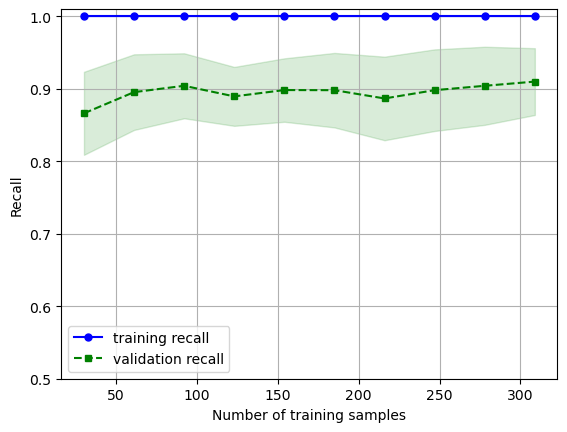

In [301]:
print('XGBOOST - Learning Curve')
plot_learning_curves(rf_classifier)

XGBOOST - Learning Curve


C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

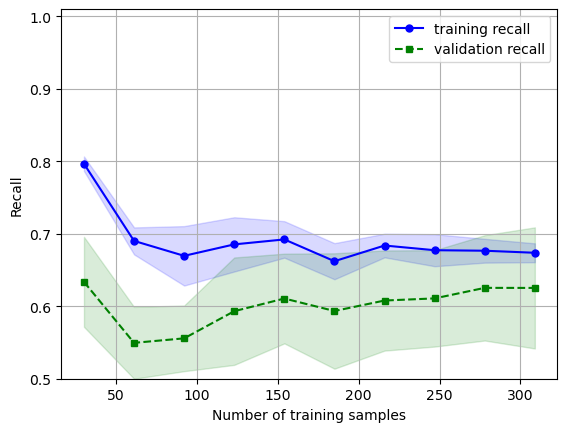

In [302]:
print('XGBOOST - Learning Curve')
plot_learning_curves(RS_model)

In [307]:
from sklearn.metrics import roc_auc_score, roc_curve

In [303]:
y_pred_proba = xg_clf.predict_proba(x_test)[:, 1]

In [304]:
y_pred_proba2 = rf_classifier.predict_proba(x_test)[:, 1]

In [305]:
y_pred_proba3 = best_model.predict_proba(x_test)[:, 1]

In [308]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [309]:
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_proba2)

In [310]:
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_pred_proba3)

In [311]:
auc_score = roc_auc_score(y_test, y_pred_proba)

In [312]:
auc_score2 = roc_auc_score(y_test, y_pred_proba2)

In [313]:
auc_score3 = roc_auc_score(y_test, y_pred_proba3)

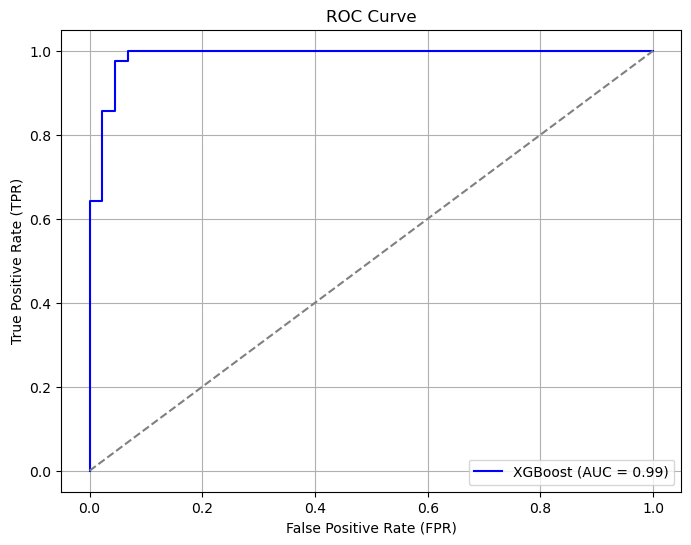

In [314]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {auc_score:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

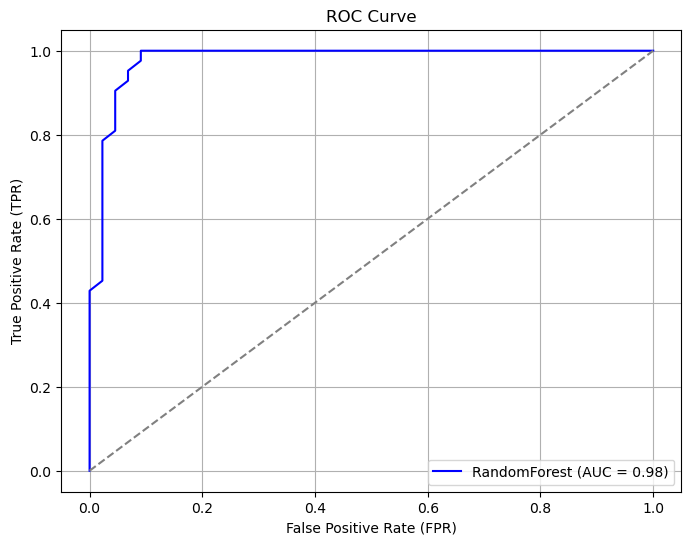

In [315]:
plt.figure(figsize=(8, 6))
plt.plot(fpr2, tpr2, label=f'RandomForest (AUC = {auc_score2:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

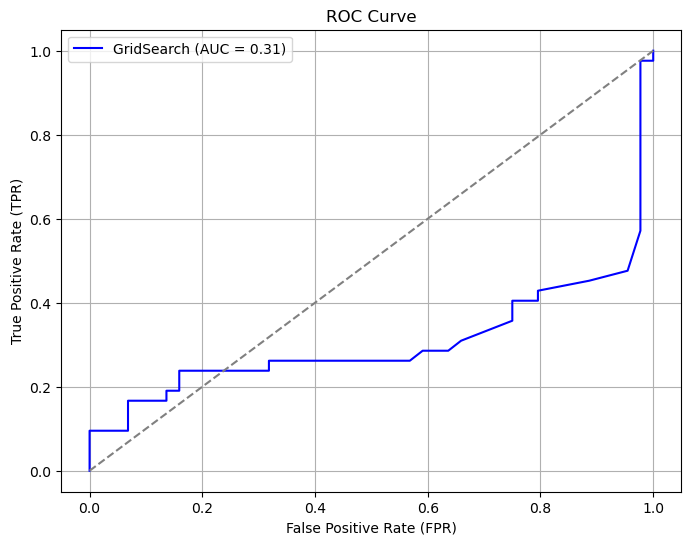

In [316]:
plt.figure(figsize=(8, 6))
plt.plot(fpr3, tpr3, label=f'GridSearch (AUC = {auc_score3:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()